In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'datasets\reclame_aqui_completo_ambev_v3.csv', 
                 parse_dates=['date', 'time_answer', 'time_client'],
                 index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1010 non-null   datetime64[ns]
 1   uf                  1010 non-null   object        
 2   city                1010 non-null   object        
 3   title               1010 non-null   object        
 4   coment              1010 non-null   object        
 5   answer              1001 non-null   object        
 6   time_answer         1001 non-null   datetime64[ns]
 7   coment_client_text  1010 non-null   object        
 8   time_client         1010 non-null   datetime64[ns]
 9   resolved            1010 non-null   object        
 10  business            1010 non-null   object        
 11  assessment          1010 non-null   int64         
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 94.8+ KB


In [3]:
df.head()

,date,uf,city,title,coment,answer,time_answer,coment_client_text,time_client,resolved,business,assessment
0,2021-07-27 00:45:00,AL,Maceió,Quero fazer acordo,Fiz uma compra em seguida acabei fechando e nã...,"Olá Alame,Enviamos as orientações de seu caso ...",2021-07-29 13:06:00,Muito satisfatório,2021-07-29 13:21:00,Resolvido,Sim,8
1,2021-07-26 16:52:00,SP,São Paulo,Estou sendo perseguido pela logística do cdd d...,Ha oito meses estou sendo perseguido pela logí...,"Olá Alexandre,Informamos que encaminhamos o se...",2021-07-27 11:27:00,Pessimo,2021-07-27 11:30:00,Não resolvido,Não,0
2,2021-07-26 16:27:00,RJ,Armação dos Búzios,Código cliente,"Realizei o cadastro no app e já faz dias, não ...","Olá Adriana,Conforme conversamos, o sistema nã...",2021-07-28 13:28:00,Fui muito bem atendida e orientada. O represen...,2021-07-28 17:39:00,Resolvido,Sim,10
3,2021-07-26 15:15:00,SP,Cotia,Não aumentam prazo do boleto,"Deixo aqui, minha grande insatisfação com AMBE...","Olá Tadeu,Informamos que encaminhamos seu caso...",2021-07-27 11:04:00,"Vocês não trabalham com verdade, meu score no ...",2021-07-27 15:59:00,Não resolvido,Não,0
4,2021-07-24 23:01:00,SC,Camboriú,Equipamento,Aguardando equipamento para meu comercio desde...,"Olá, William.Informamos que sua solicitação fo...",2021-07-26 12:13:00,9,2021-07-27 23:45:00,Não resolvido,Não,0


### Seaborn

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
df.head()

,date,uf,city,title,coment,answer,time_answer,coment_client_text,time_client,resolved,business,assessment
0,2021-07-27 00:45:00,AL,Maceió,Quero fazer acordo,Fiz uma compra em seguida acabei fechando e nã...,"Olá Alame,Enviamos as orientações de seu caso ...",2021-07-29 13:06:00,Muito satisfatório,2021-07-29 13:21:00,Resolvido,Sim,8
1,2021-07-26 16:52:00,SP,São Paulo,Estou sendo perseguido pela logística do cdd d...,Ha oito meses estou sendo perseguido pela logí...,"Olá Alexandre,Informamos que encaminhamos o se...",2021-07-27 11:27:00,Pessimo,2021-07-27 11:30:00,Não resolvido,Não,0
2,2021-07-26 16:27:00,RJ,Armação dos Búzios,Código cliente,"Realizei o cadastro no app e já faz dias, não ...","Olá Adriana,Conforme conversamos, o sistema nã...",2021-07-28 13:28:00,Fui muito bem atendida e orientada. O represen...,2021-07-28 17:39:00,Resolvido,Sim,10
3,2021-07-26 15:15:00,SP,Cotia,Não aumentam prazo do boleto,"Deixo aqui, minha grande insatisfação com AMBE...","Olá Tadeu,Informamos que encaminhamos seu caso...",2021-07-27 11:04:00,"Vocês não trabalham com verdade, meu score no ...",2021-07-27 15:59:00,Não resolvido,Não,0
4,2021-07-24 23:01:00,SC,Camboriú,Equipamento,Aguardando equipamento para meu comercio desde...,"Olá, William.Informamos que sua solicitação fo...",2021-07-26 12:13:00,9,2021-07-27 23:45:00,Não resolvido,Não,0


#### Frequency of assessment in relation to the business

In [6]:
assessment_no = df[df['business'] == 'Não'][['business', 'assessment']]
assessment_yes = df[df['business'] == 'Sim'][['business', 'assessment']]
assessment_total = df[['assessment']]

In [7]:
for i in range(11):
    if not i in assessment_no['assessment'].unique():
        print('Non-existent no note:', i)
        
    if not i in assessment_yes['assessment'].unique():
        print('Non-existent yes note:', i)

Non-existent no note: 9


In [8]:
assessment_no = assessment_no.value_counts().rename('frequency').reset_index()
assessment_yes = assessment_yes.value_counts().rename('frequency').reset_index()
assessment_total = assessment_total.value_counts().rename('frequency').reset_index()

In [9]:
assessment_no

,business,assessment,frequency
0,Não,0,138
1,Não,5,13
2,Não,1,12
3,Não,3,10
4,Não,6,7
5,Não,4,7
6,Não,2,7
7,Não,10,3
8,Não,8,1
9,Não,7,1


In [10]:
new_data = {'business': 'Não', 'assessment': 9, 'frequency': 0}
assessment_no = assessment_no.append(new_data, ignore_index=True)

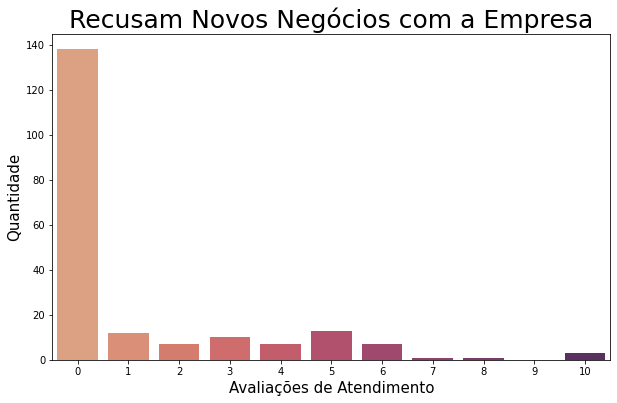

In [11]:
plt.figure(figsize=(10,6));

sns.barplot(x='assessment', y='frequency', data=assessment_no, palette="flare");
plt.xlabel('Avaliações de Atendimento', fontsize=15);
plt.ylabel('Quantidade', fontsize=15);
plt.title("Recusam Novos Negócios com a Empresa", fontsize=25);

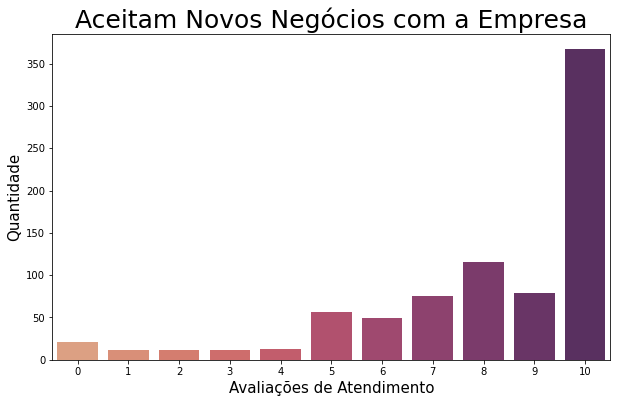

In [12]:
plt.figure(figsize=(10,6));

sns.barplot(x='assessment', y='frequency', data=assessment_yes, palette="flare");
plt.xlabel('Avaliações de Atendimento', fontsize=15);
plt.ylabel('Quantidade', fontsize=15);
plt.title("Aceitam Novos Negócios com a Empresa", fontsize=25);

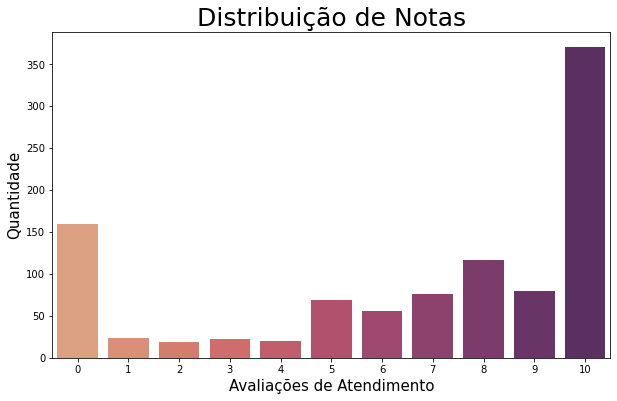

In [13]:
plt.figure(figsize=(10,6));

sns.barplot(x='assessment', y='frequency', data=assessment_total, palette="flare");
plt.xlabel('Avaliações de Atendimento', fontsize=15);
plt.ylabel('Quantidade', fontsize=15);
plt.title("Distribuição de Notas", fontsize=25);

#### Frequency of assessments in relation to months (0 to 6)

In [14]:
months = list(x for x in df['date'].dt.month.unique() if x <= 6)
six_months = df[df['date'].dt.month.isin(months)]

In [15]:
assessment_date = df.groupby([six_months.date.dt.month])['assessment'].value_counts().rename('frequency').reset_index()
assessment_date.head()

,date,assessment,frequency
0,1.0,10,39
1,1.0,0,13
2,1.0,8,13
3,1.0,5,8
4,1.0,7,6


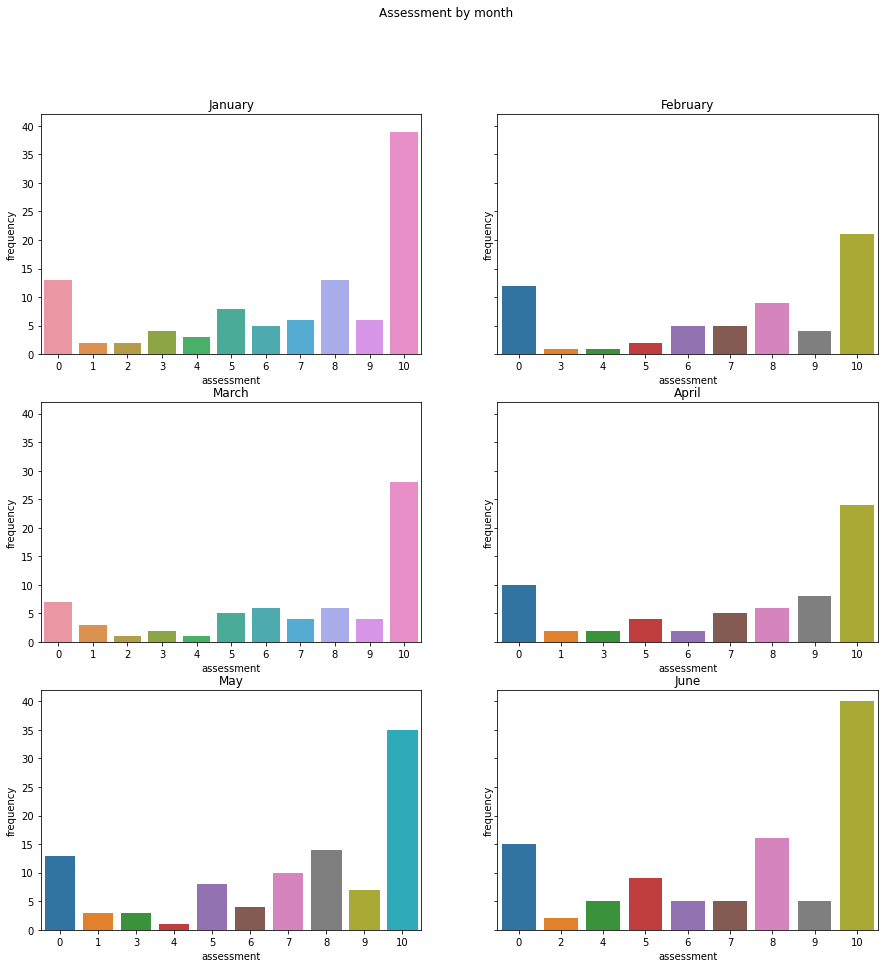

In [16]:
sns.color_palette("hls", 6)

assessment_january = assessment_date[assessment_date.date == 1]
assessment_february = assessment_date[assessment_date.date == 2]
assessment_march = assessment_date[assessment_date.date == 3]
assessment_april = assessment_date[assessment_date.date == 4]
assessment_may = assessment_date[assessment_date.date == 5]
assessment_june = assessment_date[assessment_date.date == 6]

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Assessment by month')

# January
sns.barplot(ax=axes[0][0], x=assessment_january.assessment, y=assessment_january.frequency)
axes[0][0].set_title('January')

# February
sns.barplot(ax=axes[0][1], x=assessment_february.assessment, y=assessment_february.frequency)
axes[0][1].set_title('February')

# March
sns.barplot(ax=axes[1][0], x=assessment_march.assessment, y=assessment_march.frequency)
axes[1][0].set_title('March')

# April
sns.barplot(ax=axes[1][1], x=assessment_april.assessment, y=assessment_april.frequency)
axes[1][1].set_title('April')

# May
sns.barplot(ax=axes[2][0], x=assessment_may.assessment, y=assessment_may.frequency)
axes[2][0].set_title('May')

# June
sns.barplot(ax=axes[2][1], x=assessment_june.assessment, y=assessment_june.frequency)
axes[2][1].set_title('June');